In [1]:
import numpy as np
import pandas as pd

In [2]:
df_faf2012=pd.read_csv("faf35_provisional_2012_state.csv")

In [3]:
df_faf2012=df_faf2012[df_faf2012['value_2012']!=0]

In [4]:
df_faf2012=df_faf2012.fillna(0)

In [5]:
df_faf2012_F=df_faf2012.iloc[:,0:9]

In [6]:
df_faf2012_Transform=df_faf2012[["value_2012","tons_2012","tmiles_2012"]]

In [7]:
df_faf2012_Transform=df_faf2012_Transform.transform(func = ['sqrt'])

In [8]:
df_faf2012_Transform=pd.concat([df_faf2012_F,df_faf2012_Transform],axis=1)

In [9]:
df_faf2012_Transform

,fr_orig,dms_origst,dms_destst,fr_dest,fr_inmode,dms_mode,fr_outmode,sctg2,trade_type,"(value_2012, sqrt)","(tons_2012, sqrt)","(tmiles_2012, sqrt)"
0,0.0,1,1,0.0,0.0,1,0.0,1,1,36.033584,34.729116,10.964678
1,0.0,1,1,0.0,0.0,1,0.0,2,1,22.043666,50.602931,15.485686
2,0.0,1,1,0.0,0.0,1,0.0,3,1,32.115590,52.907020,15.447254
3,0.0,1,1,0.0,0.0,1,0.0,4,1,27.444313,55.639712,16.641353
4,0.0,1,1,0.0,0.0,1,0.0,5,1,46.159158,30.195124,8.189547
...,...,...,...,...,...,...,...,...,...,...,...,...
549127,808.0,53,56,0.0,5.0,1,0.0,26,2,0.044721,0.020000,0.019901
549128,808.0,53,56,0.0,5.0,1,0.0,30,2,0.050000,0.010000,0.009940
549129,808.0,53,56,0.0,5.0,1,0.0,33,2,0.063246,0.043589,0.043388
549130,808.0,53,56,0.0,5.0,1,0.0,34,2,0.432319,0.186279,0.183264


In [10]:
df_faf2012_Transform=df_faf2012_Transform.rename(columns={('value_2012', 'sqrt'): "value_2012_sqrt",('tons_2012', 'sqrt'):"Tons_2012_sqrt",('tmiles_2012', 'sqrt'):"tmiles_2012_sqrt"})
import seaborn as sns

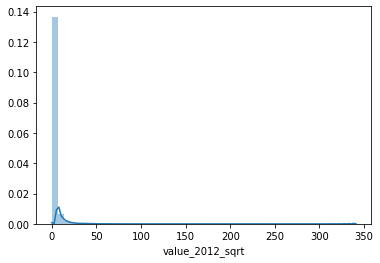

In [11]:
import seaborn  as sns
sns.distplot(df_faf2012_Transform["value_2012_sqrt"])

In [12]:
Q1= df_faf2012_Transform['value_2012_sqrt'].quantile(0.25)
Q3= df_faf2012_Transform['value_2012_sqrt'].quantile(0.75)
IQR= Q3-Q1

df_HIgher_SKEW=df_faf2012_Transform[df_faf2012_Transform['value_2012_sqrt']>(Q3+1.5*IQR)]

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_HIgher_SKEW.drop("value_2012_sqrt",axis=1)
y = df_HIgher_SKEW["value_2012_sqrt"]
VIF_Columns =pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

In [14]:
VIF_Columns

fr_orig             11.598889
dms_origst           4.582285
dms_destst           4.549022
fr_dest             15.443760
fr_inmode            8.224983
dms_mode             2.735951
fr_outmode           5.629442
sctg2                6.811813
trade_type          39.927037
Tons_2012_sqrt       2.940657
tmiles_2012_sqrt     3.442811
dtype: float64

In [15]:
df_HIgher_SKEW=df_HIgher_SKEW.drop("trade_type",axis=1)

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df_HIgher_SKEW.drop("value_2012_sqrt",axis=1)
y = df_HIgher_SKEW["value_2012_sqrt"]
VIF_Columns =pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

In [17]:
VIF_Columns

fr_orig             8.427003
dms_origst          3.800807
dms_destst          3.777579
fr_dest             5.763633
fr_inmode           8.222211
dms_mode            2.469741
fr_outmode          5.616763
sctg2               4.270204
Tons_2012_sqrt      2.939734
tmiles_2012_sqrt    3.281619
dtype: float64

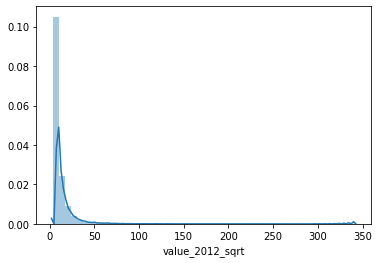

In [18]:
sns.distplot(df_HIgher_SKEW["value_2012_sqrt"])

In [19]:
X = df_HIgher_SKEW.drop(["value_2012_sqrt"],axis=1)
y = df_HIgher_SKEW["value_2012_sqrt"]
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection

In [20]:
values=[]
reg_bias=[]
reg_var=[]
for val in np.arange(1,15):
    regressor=RandomForestRegressor(n_estimators=val,random_state=0)
    kfold=model_selection.KFold(n_splits=15,shuffle=True,random_state=5)
    cv_results=model_selection.cross_val_score(regressor,X,y,scoring="r2",cv=kfold)
    reg_bias.append(1-np.mean(cv_results))
    reg_var.append(np.std(cv_results,ddof=1))
    values.append(val)
    
RF_bias=pd.DataFrame({"Estimators":values,"B.E":reg_bias})
RF_var=pd.DataFrame({"Estimators":values,"B.E":reg_var})

In [0]:
RF_bias

,Estimators,B.E
0,1,0.366096
1,2,0.263501
2,3,0.233195
3,4,0.216556
4,5,0.205857
5,6,0.199467
6,7,0.193930
7,8,0.190589
8,9,0.188338
9,10,0.186448


In [0]:
RF_bias[RF_bias["B.E"]==RF_bias["B.E"].min()]

,Estimators,B.E
13,14,0.181819


In [0]:
RF_var[RF_var["B.E"]==RF_var["B.E"].min()]

,Estimators,B.E
9,10,0.024482


In [0]:
1-0.181819

0.818181

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
X = df_HIgher_SKEW.drop(["value_2012_sqrt"],axis=1)
y = df_HIgher_SKEW["value_2012_sqrt"]     
values=[]
ADA_BIAS=[]
ADA_VAR=[]
for val in np.arange(1,101):
    ADA=AdaBoostRegressor(base_estimator=regressor,n_estimators=val,random_state=0)
    kfold=model_selection.KFold(n_splits=3,shuffle=True,random_state=5)
    cv_results=model_selection.cross_val_score(ADA,X,y,scoring="r2",cv=kfold)
    ADA_BIAS.append(1-np.mean(cv_results))
    ADA_VAR.append(np.std(cv_results,ddof=1))
    values.append(val)
    
ADA_BOOST=pd.DataFrame({"Estimators":values,"B.E":ADA_BIAS,"V.E":ADA_VAR})

In [ ]:
ADA_BOOST

In [0]:
df_HIgher_SKEW

,fr_orig,dms_origst,dms_destst,fr_dest,fr_inmode,dms_mode,fr_outmode,sctg2,value_2012_sqrt,Tons_2012_sqrt,tmiles_2012_sqrt
0,0.0,1,1,0.0,0.0,1,0.0,1,36.033584,34.729116,10.964678
1,0.0,1,1,0.0,0.0,1,0.0,2,22.043666,50.602931,15.485686
2,0.0,1,1,0.0,0.0,1,0.0,3,32.115590,52.907020,15.447254
3,0.0,1,1,0.0,0.0,1,0.0,4,27.444313,55.639712,16.641353
4,0.0,1,1,0.0,0.0,1,0.0,5,46.159158,30.195124,8.189547
...,...,...,...,...,...,...,...,...,...,...,...
548969,808.0,53,53,0.0,3.0,1,0.0,35,4.109063,1.202747,0.331902
548973,808.0,53,53,0.0,3.0,1,0.0,39,4.618820,3.218074,0.713378
548985,808.0,53,53,0.0,3.0,3,0.0,5,4.899469,3.299257,0.610072
549002,808.0,53,53,0.0,3.0,5,0.0,30,6.882717,2.524520,0.562010


In [0]:
df_HIgher_SKEW["value_2012_sqrt"]=df_HIgher_SKEW["value_2012_sqrt"]**(2)

In [0]:
df_HIgher_SKEW.min()

fr_orig              0.0000
dms_origst           1.0000
dms_destst           1.0000
fr_dest              0.0000
fr_inmode            0.0000
dms_mode             1.0000
fr_outmode           0.0000
sctg2                1.0000
value_2012_sqrt     15.8572
Tons_2012_sqrt       0.0000
tmiles_2012_sqrt     0.0000
dtype: float64

In [0]:
df_HIgher_SKEW.max()

fr_orig                808.000000
dms_origst              56.000000
dms_destst              56.000000
fr_dest                808.000000
fr_inmode                7.000000
dms_mode                 8.000000
fr_outmode               7.000000
sctg2                   99.000000
value_2012_sqrt     116190.009200
Tons_2012_sqrt         441.843688
tmiles_2012_sqrt       327.358186
dtype: float64